# Python演習課題7
※コードを実行する際は，▶ ボタンをクリックするか，ShiftキーとEnterキーを同時に押してください．

※<code>[ア]</code>や<code>[イ]</code>などにコードを記入する際は，角括弧（[]）は削除してください．

**課題①-1**<br>
分類タスクの学習と評価を行うためのデータを読み込みます．<br>
今回は[Titanic Dataset](http://stanford.io/3hWsoR7)を利用します．このデータには，タイタニック号乗船者の生存状況（0：死亡，1：生存）と，各乗船者の属性のデータが含まれています．属性には，

* 性別（男性：0，女性：1）
* 年齢
* 乗客クラス（1～3等）
* タイタニック号に同乗した兄弟，配偶者の数
* タイタニック号に同乗した親，子の数
* 旅客運賃

があります．<br>

以下の<code>[    ア    ]</code>を埋め，csvファイルからデータを読み込みましょう．なお，csvファイルは https://bit.ly/3q3kCYF から取得してください．適切に読み込まれたら，内容が表示されます．

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# csvファイルの読み込み
df = pd.read_csv('https://bit.ly/3q3kCYF')

# データを表示
df

,Survived,Name,Sex,Age,Pclass,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,Mr. Owen Harris Braund,0,22.0,3,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,1,0,71.2833
2,1,Miss. Laina Heikkinen,1,26.0,3,0,0,7.9250
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,1,0,53.1000
4,0,Mr. William Henry Allen,0,35.0,3,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,Rev. Juozas Montvila,0,27.0,2,0,0,13.0000
883,1,Miss. Margaret Edith Graham,1,19.0,1,0,0,30.0000
884,0,Miss. Catherine Helen Johnston,1,7.0,3,1,2,23.4500
885,1,Mr. Karl Howell Behr,0,26.0,1,0,0,30.0000


**課題①-2**<br>
以下の<code>[    イ    ]</code>～<code>[    エ    ]</code>を埋め，特徴量Xおよび正解ラベルyを獲得しましょう．<br>
生存状況を正解ラベルy，性別～旅客運賃までを入力X（特徴量）としてください．<br>
<code>.values</code>を利用してpandas.DataFrameからnumpy.ndarrayに変換すると，変換後のデータ型はobject型となります．<br>
object型は正解ラベルとして利用できないため，型変換を行いint型にしてください（講義資料末尾の補足を参照）．

In [ ]:
# pandas.DataFrameからnumpy.ndarrayに変換
a = df.values

# 特徴量Xおよび正解ラベルyを獲得
## 注意：yはデータ型をintに変換すること
X = a[:,2:8]
y = a[:,0].astype(dtype=int)

**課題①-3**<br>
以下の<code>[    オ    ]</code>を埋め，学習データおよびテストデータを獲得しましょう．<br>
学習データの割合は80%，テストデータの割合は20%となるようにしてください．

In [ ]:
# train_test_splitを用いて訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

**課題①-4**<br>
X_train，X_test，y_trainおよびy_testの各次元の要素数を<code>.shape</code>を利用して表示しましょう．<br>
<code>train_test_split</code>を用いて学習データが80%，テストデータが20%の割合に分けられていれば，Xとyのそれぞれに関して第1次元の要素数が概ね8:2の割合になっていることを確認できます．<br>
また，第2次元の要素数は上述した属性の数である6になっていることを確認できます．

In [ ]:
# X_trainの要素数を表示
print(X_train.shape)

# X_testの要素数を表示
print(X_test.shape)

# y_trainの要素数を表示
print(y_train.shape)

# y_testの要素数を表示
print(y_test.shape)

(709, 6)
(178, 6)
(709,)
(178,)


**課題①-5**<br>
X_trainおよびy_trainの先頭行（0番目）の要素を表示しましょう．<br>
X_trainには上述した6つの属性の値が，y_trainには生存状況が保持されていることを確認できます．

In [ ]:
# X_trainの先頭行の要素
print(X_train[0,:])

# y_trainの先頭行の要素
print(y_train[0])

[1 3.0 3 3 1 25.4667]
0


**課題②**<br>
本課題では，K最近傍法に基づく分類を行います．<br>

以下の<code>[    カ    ]～[    ケ    ]</code>を埋め，近傍の数を1（n_neighborsを1）とした場合のK最近傍法による分類タスクの学習と評価を行いましょう．

* 用いる近傍の数（<code>n_neighbors</code>）：1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# neighborsのKNeighborsClassifierを初期化
nn = KNeighborsClassifier(n_neighbors = 1)

# 訓練データからモデルを学習
nn.fit(X_train, y_train)

# モデルを用いてテストデータのラベルを予測
y_pred = nn.predict(X_test)

# テストデータを用いて精度（正解率）を評価
print('accuracy: {}'.format(accuracy_score(y_test, y_pred)))

accuracy: 0.7303370786516854


**課題③**<br>
本課題では，K最近傍法に基づく分類を行います．<br>

以下の<code>[    コ    ]～[    ス    ]</code>を埋め，近傍の数を3（n_neighborsを3）とした場合のK最近傍法による分類タスクの学習と評価を行いましょう．

* 用いる近傍の数（<code>n_neighbors</code>）：3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# neighborsのKNeighborsClassifierを初期化
knn = KNeighborsClassifier(n_neighbors = 3)

# 訓練データからモデルを学習
knn.fit(X_train, y_train)

# モデルを用いてテストデータのラベルを予測
y_pred = knn.predict(X_test)

# テストデータを用いて精度（正解率）を評価
print('accuracy: {}'.format(accuracy_score(y_test, y_pred)))

accuracy: 0.6797752808988764


**課題④**<br>
本課題では，ニューラルネットワーク（多層パーセプトロン）による分類タスクにチャレンジします．<br>

以下の<code>[    セ    ]～[    チ    ]</code>を埋め，ニューラルネットワーク（多層パーセプトロン）による分類タスクの学習と評価を行いましょう．<br>
ただし，パラメータを以下に設定すること．

* 隠れ層（<code>hidden_layer_sizes</code>）：(100,100)
* 活性化関数（<code>activation</code>）：relu
* バッチサイズ（<code>batch_size</code>）：255
* 最大イテレーション回数（<code>max_iter</code>）：300

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# neural_networkのMLPClassifierを初期化
mlp = MLPClassifier(hidden_layer_sizes = (100, 100), activation = 'relu', batch_size = 255, max_iter = 300)

# 訓練データからモデルを学習
mlp.fit(X_train, y_train)

# モデルを用いてテストデータのラベルを予測
y_pred = mlp.predict(X_test)

# テストデータを用いて精度（正解率）を評価
print('accuracy: {}'.format(accuracy_score(y_test, y_pred)))

accuracy: 0.7808988764044944


**課題⑤**<br>
これまでの課題で，モデルの性能を評価する手法として正解率（Accuracy）を用いてきました．本課題では，混同行列（Confusion Matrix）を用いてモデルの評価を行います．<br>
以下に，最近傍法のモデルの予測結果（<code>nn.predict(X_test)</code>）と正解ラベル（<code>y_test</code>）から混同行列の計算し，それを描画する例を示します．

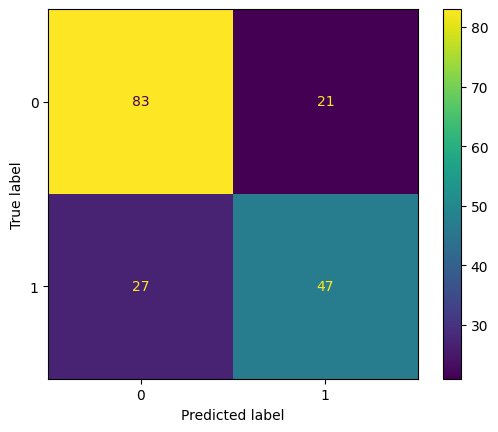

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 混合行列を算出
nn_cm = confusion_matrix(y_test, nn.predict(X_test))

# 混合行列を表示
nn_cm_disp = ConfusionMatrixDisplay(nn_cm, display_labels=nn.classes_)
nn_cm_disp.plot()

上記を参考に，K近傍法および多層パーセプトロンのモデルの予測結果から混同行列を計算し，それを描画してください．

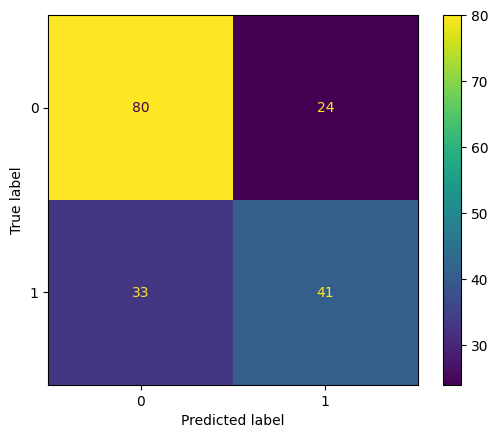

In [ ]:
## K近傍法
y_pred = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, y_pred)
knn_cm_disp = ConfusionMatrixDisplay(knn_cm, display_labels=knn.classes_)
knn_cm_disp.plot()

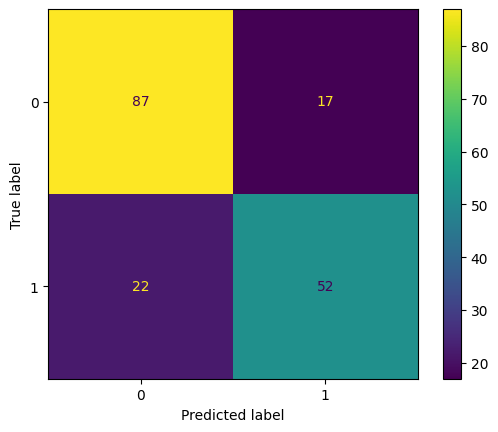

In [ ]:
## 多層パーセプトロン
y_pred = mlp.predict(X_test)
mlp_cm = confusion_matrix(y_test, y_pred)
mlp_cm_disp = ConfusionMatrixDisplay(mlp_cm, display_labels=mlp.classes_)
mlp_cm_disp.plot()